# have comments in code
# summaries- what we did, why we did, explain terms, equations, and methods
missing values- none   

outliers- numerical (box plot) - Shreya
preprocessing - changing column names, clean categorical attrb (finding the invalid ones and dealing with ones) - Kulsoom
graphs- types for all attb (binary) - Areesha, Rida 
normalization- Richa

In [67]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reference- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# Where to save the figures; method can be used later
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [68]:
data = pd.read_csv("student-por.csv") # reading the csv file with the data

print(data.shape) # to understand the dimensions of the dataset
print("rows = {}".format(data.shape[0])) # to display the number of rows/instances
print("columns = {}".format(data.shape[1])) # to display the number of columns/attributes

(649, 33)
rows = 649
columns = 33


In [69]:
data.head(10) # to get a glimpse of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [70]:
data.info() # to understand the attributes and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [71]:
data.isnull().sum().sum() # to check for any null values in the dataset

0

In [87]:
data.rename(columns={'Dalc': 'workday_alcohol', 'Medu':'mother_edu'},
          inplace=True, errors='raise')

KeyError: "['Dalc', 'Medu'] not found in axis"

In [ ]:
data.describe() # to view a summary of the descriptive statistics of the numerical attributes in the dataset

In [ ]:
# Computing IQR
Q1 = data["age"].quantile(0.25)
Q3 = data["age"].quantile(0.75)
IQR = Q3 - Q1

age_outliers = data[(data["age"]<(Q1 - 1.5 * IQR)) | (data["age"]>(Q3 + 1.5 * IQR))] 

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
data = data[(data["age"]>=(Q1 - 1.5 * IQR)) & (data["age"]<=(Q3 + 1.5 * IQR))] 
data

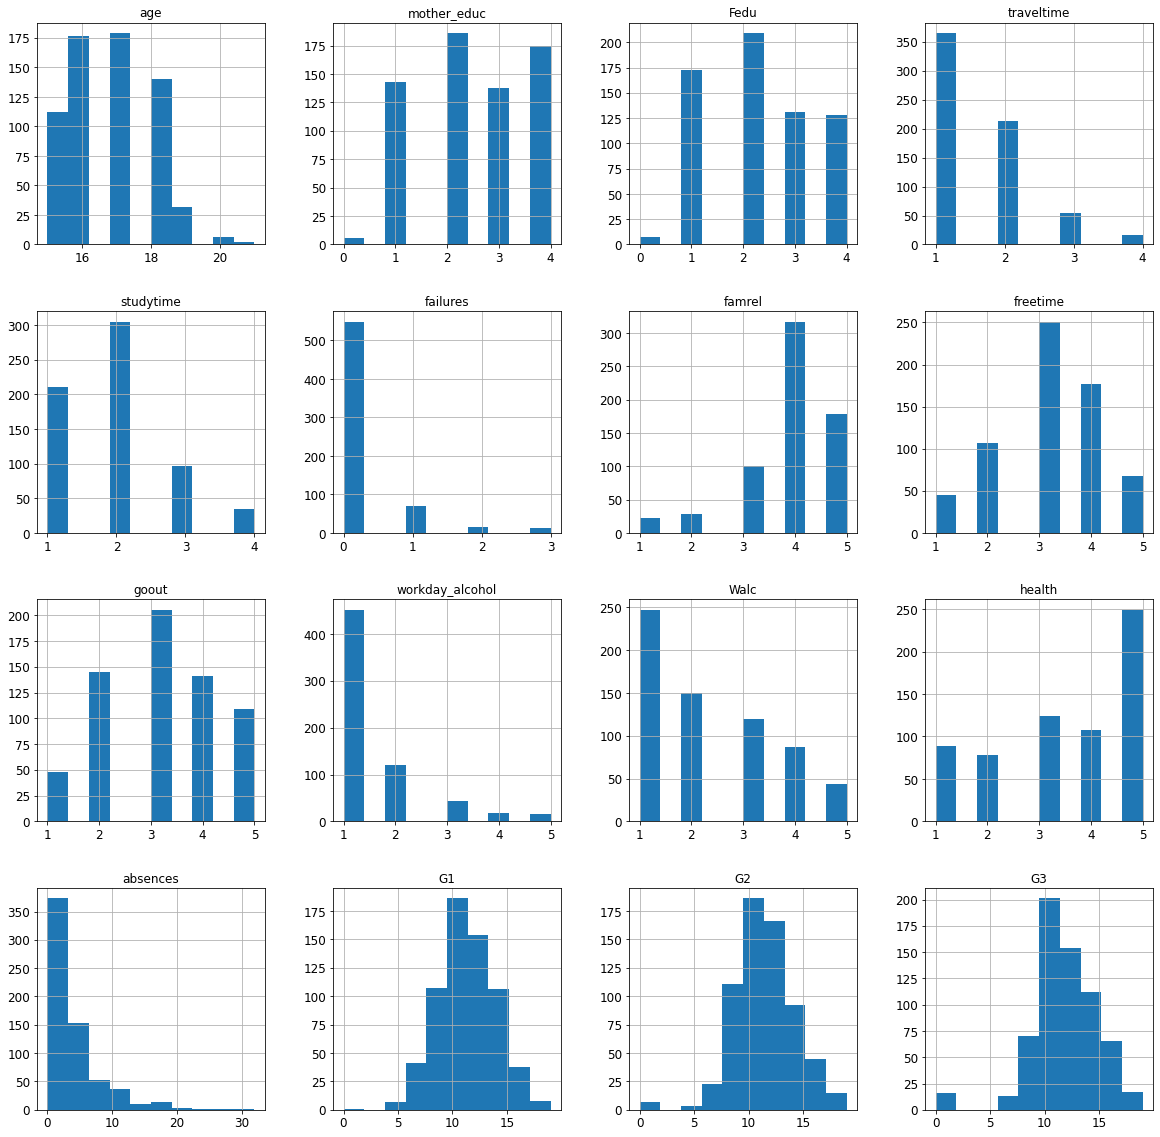

In [75]:
#To plot a histogram for each numerical attribute
data.hist(figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='absences', ylabel='G3'>

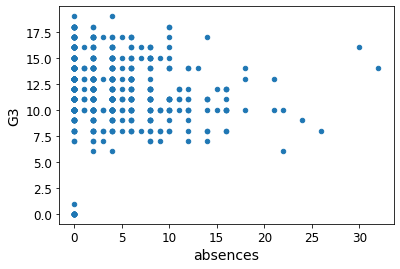

In [88]:
data.plot(kind="scatter", x="absences", y="G3")


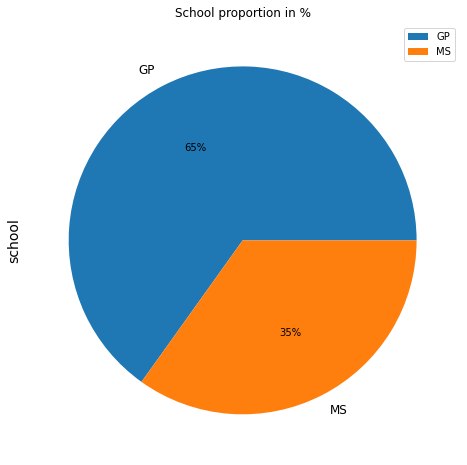

In [77]:
plt.figure(figsize=(10,8))
data.school.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('School proportion in %')
plt.legend()

In [78]:
corr_matrix = data.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["G3"].sort_values(ascending=False)

G3                 1.000000
G2                 0.918813
G1                 0.825648
studytime          0.247196
mother_educ        0.242456
Fedu               0.208841
famrel             0.067361
goout             -0.082986
absences          -0.085959
age               -0.093939
health            -0.105267
freetime          -0.120611
traveltime        -0.130201
Walc              -0.170818
workday_alcohol   -0.195075
failures          -0.385779
Name: G3, dtype: float64